In [3]:
import scipy.spatial
import numpy as np
import re
c=[]
data = open("/Users/fedorstepanov/Downloads/_3a8d746cf4d86fba2f31586f239d11fd_sentences.txt", "r") # открываем
sent = data.readlines()   #считываем все строки


i = 0
for sentence in sent: # берем первую строку
    sentence = re.split('[^a-z]', sentence.lower()) # разбиваем на слова
    c.append(list(filter(None, sentence))) # убираем пустые слова из первой строки и сохраняем
    i += 1

word_index = dict() # создаем пустой словарь
i = 0 
for sentence in c: # берем первую строку
    for word in sentence: # берем первое слово в первой строке
        if word not in word_index: # если слова нету в словаре то  
            word_index[word] = i # добавляем его по индексом 0 в словарь
            i += 1 # следующий индекс будет на единицу больше
         

m = np.zeros((len(c), len(word_index))) # создаем массив размерность строки*слова


for sent_i in range(0, len(c)): # смотрим первую строку
    for word in c[sent_i]: # смотрим слова в первой строке
        word_i = word_index[word] # находим индекс этого слова
        m[sent_i][word_i] += 1 # вносим это слово в массив, изначально там нули но как только в стркое нахоидм слово с этим индексов 

distances =list() # смотрим теперь каждую строку
for i in range(0, len(c)):
    distance = scipy.spatial.distance.cosine(m[0],m[i]) # считаем косинусную дистанцию
    distances.append((i,distance))
    
sort = sorted(distances,key=lambda tup: tup[1]) # сортируем
print(sort)

[(0, 0.0), (6, 0.7327387580875756), (4, 0.7770887149698589), (21, 0.8250364469440588), (10, 0.8328165362273942), (12, 0.8396432548525454), (16, 0.8406361854220809), (20, 0.8427572744917122), (2, 0.8644738145642124), (13, 0.8703592552895671), (14, 0.8740118423302576), (11, 0.8804771390665607), (8, 0.8842724875284311), (19, 0.8885443574849294), (3, 0.8951715163278082), (9, 0.9055088817476932), (7, 0.9258750683338899), (5, 0.9402385695332803), (15, 0.9442721787424647), (18, 0.9442721787424647), (1, 0.9527544408738466), (17, 0.956644501523794)]


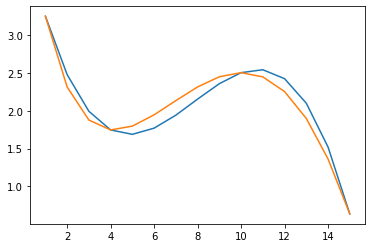

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [2]:
import numpy as np 
import scipy.linalg as scli
import matplotlib.pyplot as plt

#Рассматриваемая функция имеет вид
def getf(x):
    return np.sin(x/5.0)*np.exp(x/10.0) + 5*np.exp(-x/2.0)

#Многочлен, аппроксимирующий функцию    
def getFapprox(w0,w1, w2, w3, x):
    return w0 + w1*x + w2*x*x + w3*x*x*x

A = np.array([[1., 1., 1., 1.],[1.0, 4., 16., 64], [1., 10., 100., 1000], [1., 15., 225., 3375]])
b = np.array([getf(1.), getf(4.), getf(10.), getf(15.)])
coefs = scli.solve(A,b)
x = range(1, 16)
f0 =  [getFapprox(coefs[0],coefs[1], coefs[2], coefs[3], a) for a in x]
plt.plot(x, f0)
f = [getf(a) for a in x]
plt.plot(x, f)
plt.show()
print(coefs)
